<a href="https://colab.research.google.com/github/alvitohawari/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/blob/main/Chapter_11_training_deep_neural_networkss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 11 – Training Deep Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 11._

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)  # make results reproducible

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Vanishing/Exploding Gradients Problem

In [ ]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


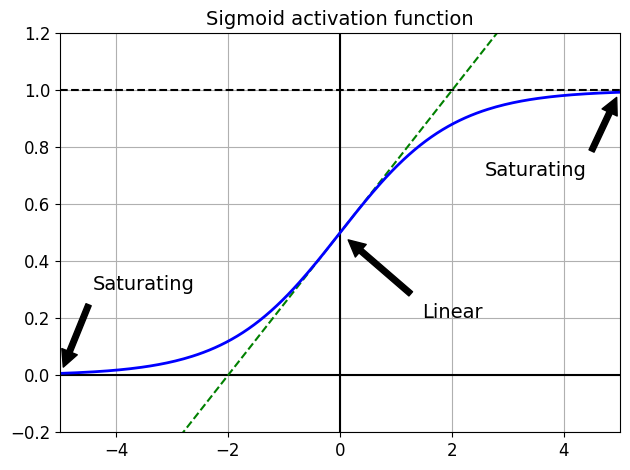

In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

## Xavier and He Initialization

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

#### Weight initialization (He / Variance Scaling)
Deep networks can suffer from **vanishing or exploding gradients** when signals shrink or blow up across many layers.
**He initialization** (often paired with ReLU-family activations) helps keep activation/gradient variance in a healthy range, improving stability and speed.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")  # define a layer (weights learned during training)

<Dense name=dense, built=False>

In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)  # define a layer (weights learned during training)

<Dense name=dense_1, built=False>

## Nonsaturating Activation Functions

### Leaky ReLU

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

Saving figure leaky_relu_plot


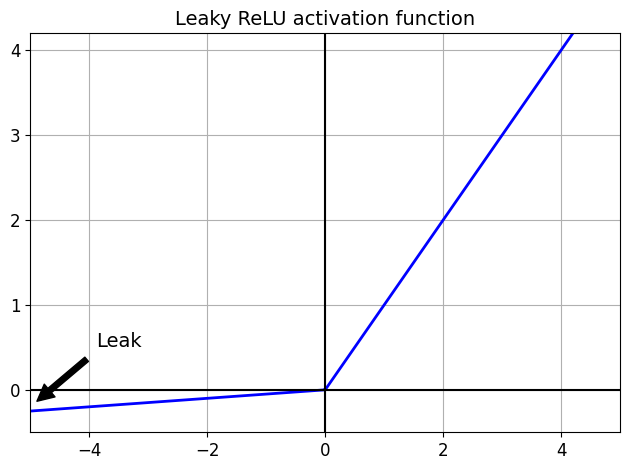

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparse_sigmoid',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4844 - loss: 1.6043 - val_accuracy: 0.7194 - val_loss: 0.8624
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7318 - loss: 0.8222 - val_accuracy: 0.7712 - val_loss: 0.7036
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7740 - loss: 0.6922 - val_accuracy: 0.7970 - val_loss: 0.6313
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7940 - loss: 0.6269 - val_accuracy: 0.8122 - val_loss: 0.5871
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8064 - loss: 0.5854 - val_accuracy: 0.8214 - val_loss: 0.5566
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8144 - loss: 0.5559 - val_accuracy: 0.8292 - val_loss: 0.5339
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8203 - loss: 0.5337 - val_accuracy: 0.8336 - val_loss: 0.5167
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8248 - loss: 0.5167 -

Now let's try PReLU:

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4962 - loss: 1.7081 - val_accuracy: 0.7366 - val_loss: 0.8767
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7474 - loss: 0.8295 - val_accuracy: 0.7814 - val_loss: 0.6941
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7805 - loss: 0.6859 - val_accuracy: 0.8008 - val_loss: 0.6192
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7964 - loss: 0.6194 - val_accuracy: 0.8116 - val_loss: 0.5751
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8065 - loss: 0.5782 - val_accuracy: 0.8208 - val_loss: 0.5451
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8143 - loss: 0.5496 - val_accuracy: 0.8280 - val_loss: 0.5231
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8204 - loss: 0.5283 - val_accuracy: 0.8334 - val_loss: 0.5061
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8258 - loss: 0.5115 -

### ELU

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

Saving figure elu_plot


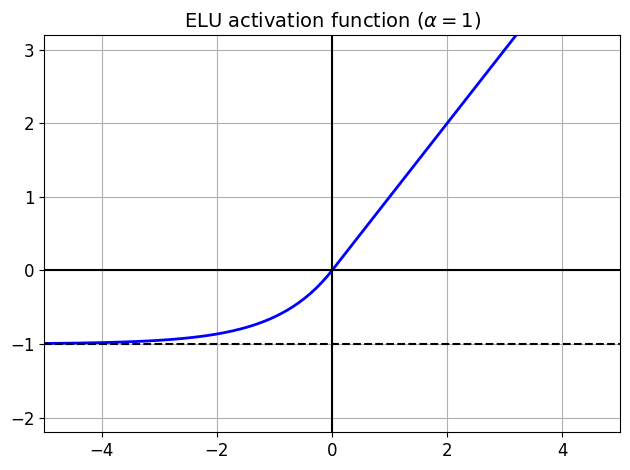

In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
keras.layers.Dense(10, activation="elu")  # define a layer (weights learned during training)

<Dense name=dense_8, built=False>

### SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


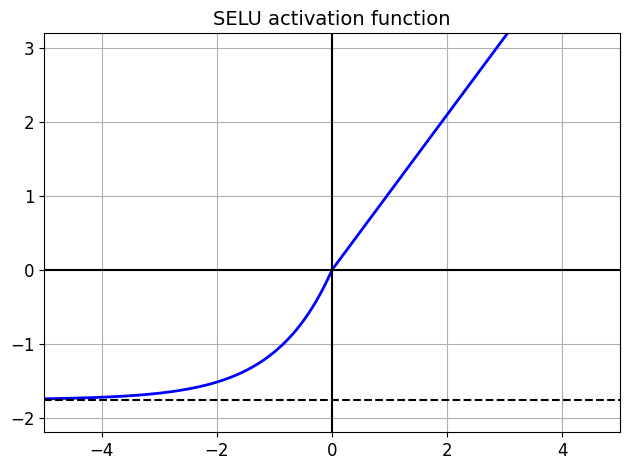

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [ ]:
np.random.seed(42)  # make results reproducible
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using SELU is easy:

In [ ]:
keras.layers.Dense(10, activation="selu",  # define a layer (weights learned during training)
                   kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [ ]:
np.random.seed(42)  # make results reproducible
tf.random.set_seed(42)  # make results reproducible

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # define a layer (weights learned during training)
model.add(keras.layers.Dense(300, activation="selu",  # define a layer (weights learned during training)
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",  # define a layer (weights learned during training)
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))  # define a layer (weights learned during training)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.4022 - loss: 1.4987 - val_accuracy: 0.6920 - val_loss: 0.8042
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.6928 - loss: 0.8260 - val_accuracy: 0.7536 - val_loss: 0.6785
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7580 - loss: 0.6692 - val_accuracy: 0.7752 - val_loss: 0.6178
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7892 - loss: 0.6076 - val_accuracy: 0.8088 - val_loss: 0.5463
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8090 - loss: 0.5508 - val_accuracy: 0.8022 - val_loss: 0.5468


Now look at what happens if we try to use the ReLU activation function instead:

In [ ]:
np.random.seed(42)  # make results reproducible
tf.random.set_seed(42)  # make results reproducible

#### Weight initialization (He / Variance Scaling)
Deep networks can suffer from **vanishing or exploding gradients** when signals shrink or blow up across many layers.
**He initialization** (often paired with ReLU-family activations) helps keep activation/gradient variance in a healthy range, improving stability and speed.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # define a layer (weights learned during training)
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))  # define a layer (weights learned during training)
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))  # define a layer (weights learned during training)
model.add(keras.layers.Dense(10, activation="softmax"))  # define a layer (weights learned during training)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.1537 - loss: 2.1646 - val_accuracy: 0.2792 - val_loss: 1.7566
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3105 - loss: 1.6299 - val_accuracy: 0.5224 - val_loss: 1.2350
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5073 - loss: 1.1838 - val_accuracy: 0.6256 - val_loss: 0.9256
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5983 - loss: 0.9790 - val_accuracy: 0.7016 - val_loss: 0.8318
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6838 - loss: 0.8211 - val_accuracy: 0.6778 - val_loss: 0.8161


Not great at all, we suffered from the vanishing/exploding gradients problem.

# Batch Normalization

#### Batch Normalization
BatchNorm normalizes intermediate activations using mini-batch statistics during training, then learns a scale and shift.
It typically **stabilizes and speeds up training**, enables larger learning rates, and can act as mild regularization. Common pattern: Dense/Conv → BN → Activation.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Dense(300, activation="relu"),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Dense(100, activation="relu"),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
#bn1.updates #deprecated

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6145 - loss: 1.1516 - val_accuracy: 0.8096 - val_loss: 0.5512
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7989 - loss: 0.5859 - val_accuracy: 0.8340 - val_loss: 0.4771
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8222 - loss: 0.5145 - val_accuracy: 0.8504 - val_loss: 0.4418
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8354 - loss: 0.4757 - val_accuracy: 0.8572 - val_loss: 0.4195
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8446 - loss: 0.4489 - val_accuracy: 0.8634 - val_loss: 0.4041
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8512 - loss: 0.4284 - val_accuracy: 0.8656 - val_loss: 0.3926
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8559 - loss: 0.4117 - val_accuracy: 0.8684 - val_loss: 0.3837
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8606 - loss: 0

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer has some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

#### Batch Normalization
BatchNorm normalizes intermediate activations using mini-batch statistics during training, then learns a scale and shift.
It typically **stabilizes and speeds up training**, enables larger learning rates, and can act as mild regularization. Common pattern: Dense/Conv → BN → Activation.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Dense(300, use_bias=False),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),  # define a layer (weights learned during training)
    keras.layers.BatchNormalization(),  # normalize activations to improve training stability
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5617 - loss: 1.3674 - val_accuracy: 0.7898 - val_loss: 0.6771
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7733 - loss: 0.7086 - val_accuracy: 0.8176 - val_loss: 0.5583
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8013 - loss: 0.6043 - val_accuracy: 0.8332 - val_loss: 0.5046
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8166 - loss: 0.5512 - val_accuracy: 0.8434 - val_loss: 0.4719
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8272 - loss: 0.5168 - val_accuracy: 0.8472 - val_loss: 0.4494
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8346 - loss: 0.4916 - val_accuracy: 0.8514 - val_loss: 0.4325
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8398 - loss: 0.4719 - val_accuracy: 0.8552 - val_loss: 0.4193
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8451 - loss: 0.

## Gradient Clipping

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

#### Gradient clipping
To handle **exploding gradients**, gradient clipping caps gradients (by norm or value), keeping parameter updates bounded and preventing divergence.

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)  # choose optimizer (parameter update rule)

#### Gradient clipping
To handle **exploding gradients**, gradient clipping caps gradients (by norm or value), keeping parameter updates bounded and preventing divergence.

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)  # choose optimizer (parameter update rule)

## Reusing Pretrained Layers

### Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))  # define a layer (weights learned during training)
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))  # define a layer (weights learned during training)
model_A.add(keras.layers.Dense(8, activation="softmax"))  # define a layer (weights learned during training)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7169 - loss: 0.8576 - val_accuracy: 0.8682 - val_loss: 0.3829
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8741 - loss: 0.3642 - val_accuracy: 0.8829 - val_loss: 0.3320
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8864 - loss: 0.3210 - val_accuracy: 0.8924 - val_loss: 0.3083
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8939 - loss: 0.2992 - val_accuracy: 0.8966 - val_loss: 0.2950
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8991 - loss: 0.2852 - val_accuracy: 0.8999 - val_loss: 0.2846
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9034 - loss: 0.2749 - val_accuracy: 0.9021 - val_loss: 0.2778
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9076 - loss: 0.2668 - val_accuracy: 0.9033 - val_loss: 0.2723
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9100 - loss: 0.2601 - 

In [ ]:
model_A.save("my_model_A.h5")

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))  # define a layer (weights learned during training)
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))  # define a layer (weights learned during training)
model_B.add(keras.layers.Dense(1, activation="sigmoid"))  # define a layer (weights learned during training)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model_B.compile(loss="binary_crossentropy",  # set loss/optimizer/metrics before training
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,  # train (forward pass + backprop + updates)
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3901 - loss: 1.0475 - val_accuracy: 0.6836 - val_loss: 0.6093
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6840 - loss: 0.6094 - val_accuracy: 0.8083 - val_loss: 0.4705
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7911 - loss: 0.4715 - val_accuracy: 0.8661 - val_loss: 0.3867
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8643 - loss: 0.3829 - val_accuracy: 0.9026 - val_loss: 0.3271
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9155 - loss: 0.3196 - val_accuracy: 0.9341 - val_loss: 0.2830
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9435 - loss: 0.2734 - val_accuracy: 0.9462 - val_loss: 0.2496
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9562 - loss: 0.2389 - val_accuracy: 0.9533 - val_loss: 0.2238
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9612 - loss: 0.2125 - val_accuracy: 0.9615 - val_loss: 0.2032


In [ ]:
model_B.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,803 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### Transfer learning & freezing layers
When reusing a pretrained network, freeze early layers (feature extractor) and train a new head.
Optionally unfreeze later for fine-tuning with a smaller learning rate.

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))  # define a layer (weights learned during training)

Note that `model_B_on_A` and `model_A` actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build `model_B_on_A` on top of a *clone* of `model_A`:

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))  # define a layer (weights learned during training)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

#### Transfer learning & freezing layers
When reusing a pretrained network, freeze early layers (feature extractor) and train a new head.
Optionally unfreeze later for fine-tuning with a smaller learning rate.

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False  # freeze pretrained layers

model_B_on_A.compile(loss="binary_crossentropy",  # set loss/optimizer/metrics before training
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
                     metrics=["accuracy"])

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,  # train (forward pass + backprop + updates)
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",  # set loss/optimizer/metrics before training
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,  # train (forward pass + backprop + updates)
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3261 - loss: 1.5325 - val_accuracy: 0.3327 - val_loss: 1.3967
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3434 - loss: 1.4250 - val_accuracy: 0.3641 - val_loss: 1.3015
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3470 - loss: 1.3251 - val_accuracy: 0.3945 - val_loss: 1.2135
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3721 - loss: 1.2323 - val_accuracy: 0.4239 - val_loss: 1.1323
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4290 - loss: 1.0384 - val_accuracy: 0.6217 - val_loss: 0.6860
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6428 - loss: 0.6103 - val_accuracy: 0.7779 - val_loss: 0.4479
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7998 - loss: 0.3891 - val_accuracy: 0.8854 - val_loss: 0.3225
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9175 - loss: 0.2748 - val_accuracy: 0.9310 - val_loss: 0.2512
Epoc

So, what's the final verdict?

In [ ]:
model_B.evaluate(X_test_B, y_test_B)  # evaluate on validation/test set

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0913


[0.09275125712156296, 0.9919999837875366]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)  # evaluate on validation/test set

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0753


[0.07672243565320969, 0.9850000143051147]

Great! We got quite a bit of transfer: the error rate dropped by a factor of 4.9!

In [ ]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

# Faster Optimizers

## Momentum optimization

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)  # choose optimizer (parameter update rule)

## Nesterov Accelerated Gradient

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)  # choose optimizer (parameter update rule)

## AdaGrad

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)  # choose optimizer (parameter update rule)

## RMSProp

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)  # choose optimizer (parameter update rule)

## Adam Optimization

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)  # choose optimizer (parameter update rule)

## Adamax Optimization

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)  # choose optimizer (parameter update rule)

## Learning Rate Scheduling

### Power Scheduling

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)  # choose optimizer (parameter update rule)

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7920 - loss: 0.6024 - val_accuracy: 0.8628 - val_loss: 0.4014
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8650 - loss: 0.3843 - val_accuracy: 0.8688 - val_loss: 0.3732
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8769 - loss: 0.3468 - val_accuracy: 0.8720 - val_loss: 0.3593
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8855 - loss: 0.3221 - val_accuracy: 0.8758 - val_loss: 0.3501
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8930 - loss: 0.3030 - val_accuracy: 0.8772 - val_loss: 0.3438
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8984 - loss: 0.2873 - val_accuracy: 0.8782 - val_loss: 0.3387
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9031 - loss: 0.2739 - val_accuracy: 0.8802 - val_loss: 0.3352
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9066 - loss: 0.2621 - 

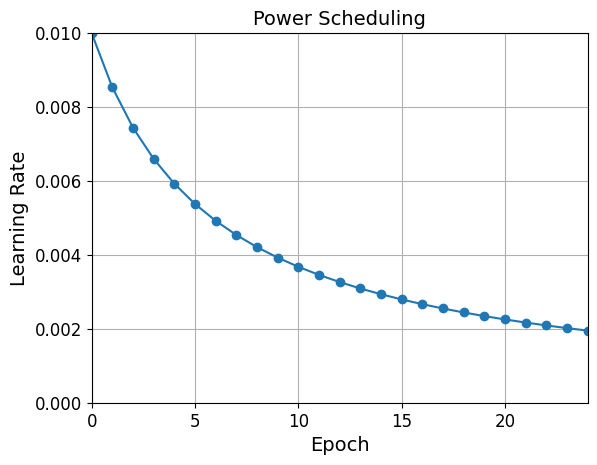

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 25

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)  # learning-rate schedule
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7532 - loss: 0.9977 - val_accuracy: 0.8200 - val_loss: 0.6927 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8084 - loss: 0.6316 - val_accuracy: 0.8082 - val_loss: 0.6415 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8141 - loss: 0.5969 - val_accuracy: 0.7396 - val_loss: 1.2760 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8240 - loss: 0.5928 - val_accuracy: 0.8412 - val_loss: 0.5668 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8445 - loss: 0.4895 - val_accuracy: 0.8490 - val_loss: 0.5547 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8574 - loss: 0.4548 - val_accuracy: 0.8484 - val_loss: 0.5049 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.

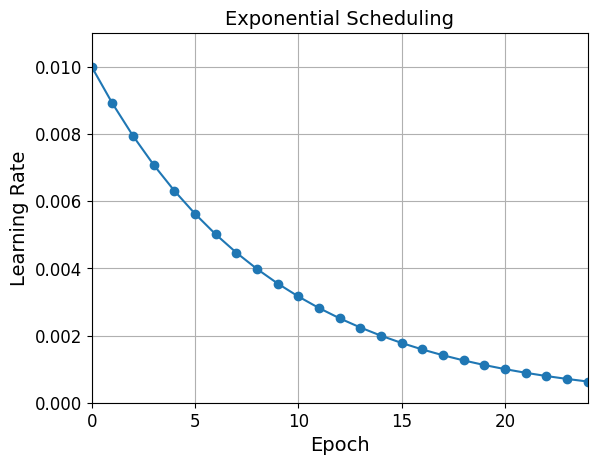

In [ ]:
plt.plot(history.epoch, [exponential_decay_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

In [ ]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):  # learning-rate schedule
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        # Access and modify the learning rate directly as a tf.Variable
        lr_var = self.model.optimizer.learning_rate
        lr_value = lr_var.numpy() # Get the current learning rate value
        new_lr_value = lr_value * 0.1**(1 / self.s)
        lr_var.assign(new_lr_value) # Set the new learning rate value

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy() # Log the final learning rate of the epoch

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)  # choose optimizer (parameter update rule)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)  # learning-rate schedule
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7597 - loss: 0.9682 - val_accuracy: 0.8134 - val_loss: 0.6450 - lr: 0.0089
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8084 - loss: 0.6229 - val_accuracy: 0.8204 - val_loss: 0.6121 - lr: 0.0079
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8266 - loss: 0.5621 - val_accuracy: 0.8524 - val_loss: 0.5311 - lr: 0.0071
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8443 - loss: 0.4986 - val_accuracy: 0.8488 - val_loss: 0.5542 - lr: 0.0063
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8514 - loss: 0.4704 - val_accuracy: 0.8464 - val_loss: 0.5865 - lr: 0.0056
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8594 - loss: 0.4488 - val_accuracy: 0.8584 - val_loss: 0.5714 - lr: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8702 - loss: 0.4018 - val_accuracy: 0.8530 - val_loss: 0.4895 - lr:

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

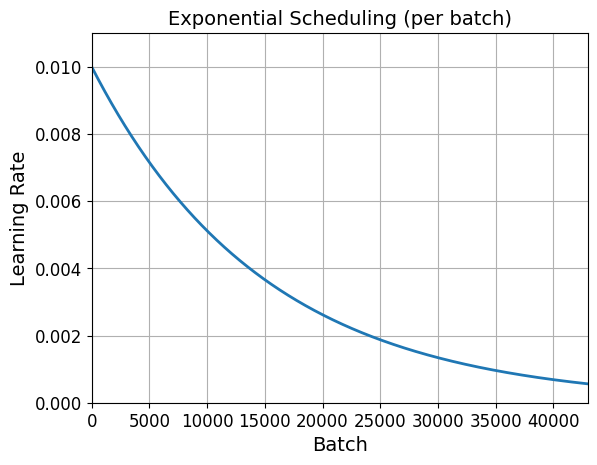

In [ ]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)  # learning-rate schedule

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7540 - loss: 0.9902 - val_accuracy: 0.8120 - val_loss: 0.6402 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7947 - loss: 0.6928 - val_accuracy: 0.7354 - val_loss: 0.9440 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7934 - loss: 0.7489 - val_accuracy: 0.8068 - val_loss: 0.6409 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7772 - loss: 0.7664 - val_accuracy: 0.8108 - val_loss: 0.7598 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7938 - loss: 0.7325 - val_accuracy: 0.7320 - val_loss: 1.0751 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8339 - loss: 0.5598 - val_accuracy: 0.8528 - val_loss: 0.6001 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.

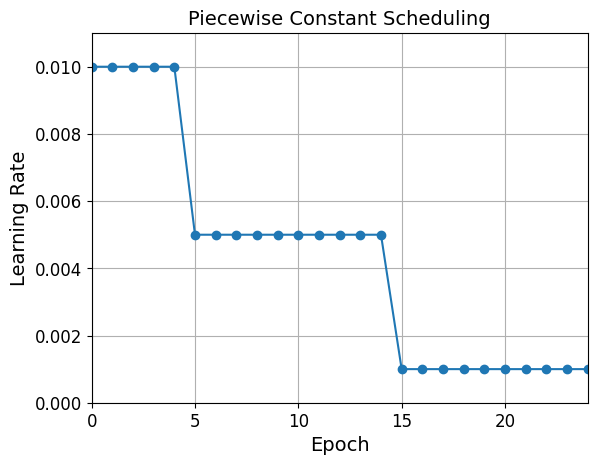

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)  # learning-rate schedule

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)  # choose optimizer (parameter update rule)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7742 - loss: 0.7167 - val_accuracy: 0.8438 - val_loss: 0.4832 - learning_rate: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8335 - loss: 0.5132 - val_accuracy: 0.8454 - val_loss: 0.5857 - learning_rate: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8432 - loss: 0.5138 - val_accuracy: 0.8354 - val_loss: 0.6541 - learning_rate: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8506 - loss: 0.5089 - val_accuracy: 0.8342 - val_loss: 0.6101 - learning_rate: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8441 - loss: 0.5474 - val_accuracy: 0.8540 - val_loss: 0.5503 - learning_rate: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8539 - loss: 0.5271 - val_accuracy: 0.8558 - val_loss: 0.6174 - learning_rate: 0.0200
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8856 -

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

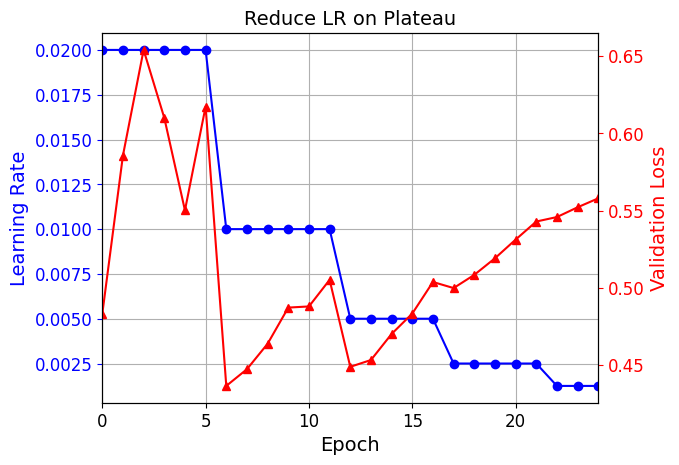

In [ ]:
if 'lr' not in history.history:
    # Manually reconstruct the learning rates based on the output of cell _NlASvCRrlYf
    # This is a workaround if 'lr' is not automatically logged by ReduceLROnPlateau.  # learning-rate schedule
    lrs_manual = []
    for epoch in range(n_epochs):
        if epoch < 6:
            lrs_manual.append(0.02)
        elif epoch < 12:
            lrs_manual.append(0.01)
        elif epoch < 17:
            lrs_manual.append(0.005)
        elif epoch < 22:
            lrs_manual.append(0.0025)
        else:
            lrs_manual.append(0.00125) # More precise value for the last reduction
    plt.plot(history.epoch, lrs_manual, "bo-")
else:
    plt.plot(history.epoch, history.history["lr"], "bo-")

plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)  # learning-rate schedule
optimizer = keras.optimizers.SGD(learning_rate)  # choose optimizer (parameter update rule)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7938 - loss: 0.5950 - val_accuracy: 0.8598 - val_loss: 0.3960
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8654 - loss: 0.3835 - val_accuracy: 0.8690 - val_loss: 0.3697
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8785 - loss: 0.3475 - val_accuracy: 0.8748 - val_loss: 0.3564
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8870 - loss: 0.3247 - val_accuracy: 0.8794 - val_loss: 0.3478
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8916 - loss: 0.3079 - val_accuracy: 0.8818 - val_loss: 0.3422
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8961 - loss: 0.2946 - val_accuracy: 0.8842 - val_loss: 0.3377
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9004 - loss: 0.2837 - val_accuracy: 0.8850 - val_loss: 0.3345
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9034 - loss: 0.2745 - 

For piecewise constant scheduling, try this:

#### Learning-rate scheduling
Learning-rate schedules often converge better than a constant LR: use larger steps early, smaller steps later.
Common choices include step decay, exponential decay, polynomial decay, and plateau-based reduction.

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(  # learning-rate schedule
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1Cycle scheduling

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        # Access and modify the learning rate directly as a tf.Variable
        lr_var = self.model.optimizer.learning_rate
        self.rates.append(lr_var.numpy()) # Use .numpy() to get value
        self.losses.append(logs["loss"])
        new_lr_value = lr_var.numpy() * self.factor
        lr_var.assign(new_lr_value) # Use .assign() to set value

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)

    # Access the learning rate variable directly
    lr_var = model.optimizer.learning_rate
    init_lr_value = lr_var.numpy() # Get initial value using .numpy()

    lr_var.assign(min_rate) # Set initial min_rate using .assign()

    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,  # train (forward pass + backprop + updates)
                        callbacks=[exp_lr])

    lr_var.assign(init_lr_value) # Restore initial value using .assign()
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

**Warning**: In the `on_batch_end()` method, `logs["loss"]` used to contain the batch loss, but in TensorFlow 2.2.0 it was replaced with the mean loss (since the start of the epoch). This explains why the graph below is much smoother than in the book (if you are using TF 2.2 or above). It also means that there is a lag between the moment the batch loss starts exploding and the moment the explosion becomes clear in the graph. So you should choose a slightly smaller learning rate than you would have chosen with the "noisy" graph. Alternatively, you can tweak the `ExponentialLearningRate` callback above so it computes the batch loss (based on the current mean loss and the previous mean loss):

```python
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)
```

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy",  # set loss/optimizer/metrics before training
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # choose optimizer (parameter update rule)
              metrics=["accuracy"])

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2552 - loss: nan


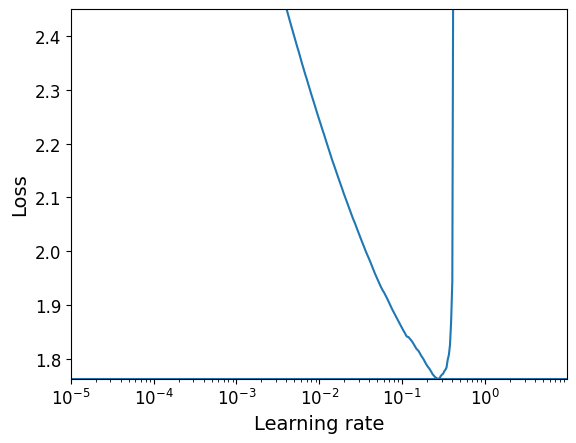

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        self.model.optimizer.learning_rate.assign(rate)

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6871 - loss: 0.9193 - val_accuracy: 0.8386 - val_loss: 0.4788
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8344 - loss: 0.4682 - val_accuracy: 0.8582 - val_loss: 0.4277
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8537 - loss: 0.4161 - val_accuracy: 0.8642 - val_loss: 0.4037
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8639 - loss: 0.3860 - val_accuracy: 0.8652 - val_loss: 0.3875
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8715 - loss: 0.3639 - val_accuracy: 0.8696 - val_loss: 0.3759
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8779 - loss: 0.3456 - val_accuracy: 0.8738 - val_loss: 0.3668
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8835 - loss: 0.3300 - val_accuracy: 0.8772 - val_loss: 0.3593
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8877 - loss: 0.3162 - val_accuracy: 

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [ ]:
layer = keras.layers.Dense(100, activation="elu",  # define a layer (weights learned during training)
                           kernel_initializer="he_normal",  # weight init to mitigate vanishing/exploding gradients
                           kernel_regularizer=keras.regularizers.l2(0.01))  # weight decay regularization
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dense(300, activation="elu",  # define a layer (weights learned during training)
                       kernel_initializer="he_normal",  # weight init to mitigate vanishing/exploding gradients
                       kernel_regularizer=keras.regularizers.l2(0.01)),  # weight decay regularization
    keras.layers.Dense(100, activation="elu",  # define a layer (weights learned during training)
                       kernel_initializer="he_normal",  # weight init to mitigate vanishing/exploding gradients
                       kernel_regularizer=keras.regularizers.l2(0.01)),  # weight decay regularization
    keras.layers.Dense(10, activation="softmax",  # define a layer (weights learned during training)
                       kernel_regularizer=keras.regularizers.l2(0.01))  # weight decay regularization
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7958 - loss: 3.2466 - val_accuracy: 0.8390 - val_loss: 0.7051
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8231 - loss: 0.7275 - val_accuracy: 0.8452 - val_loss: 0.6824


#### Weight initialization (He / Variance Scaling)
Deep networks can suffer from **vanishing or exploding gradients** when signals shrink or blow up across many layers.
**He initialization** (often paired with ReLU-family activations) helps keep activation/gradient variance in a healthy range, improving stability and speed.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

#### Weight decay (L1/L2 regularization)
L1/L2 penalties discourage large weights and help reduce overfitting.
L2 (weight decay) is the most common choice for neural networks.

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,  # define a layer (weights learned during training)
                           activation="elu",
                           kernel_initializer="he_normal",  # weight init to mitigate vanishing/exploding gradients
                           kernel_regularizer=keras.regularizers.l2(0.01))  # weight decay regularization

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7981 - loss: 3.3692 - val_accuracy: 0.8396 - val_loss: 0.7036
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8230 - loss: 0.7297 - val_accuracy: 0.8470 - val_loss: 0.6801


## Dropout

#### Weight initialization (He / Variance Scaling)
Deep networks can suffer from **vanishing or exploding gradients** when signals shrink or blow up across many layers.
**He initialization** (often paired with ReLU-family activations) helps keep activation/gradient variance in a healthy range, improving stability and speed.

#### Dropout / AlphaDropout
Dropout randomly zeros a fraction of activations during training to reduce co-adaptation and improve generalization.
For SELU-based self-normalizing networks, **AlphaDropout** is used to preserve the self-normalizing behavior.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### Adaptive optimizers (AdaGrad / RMSProp / Adam / Nadam)
Adaptive optimizers adjust step sizes per-parameter.
AdaGrad can decay learning rates too much; RMSProp fixes this with an EMA of squared gradients.
Adam combines momentum and RMSProp-style adaptation and is a strong default; Nadam adds Nesterov momentum.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.Dropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.Dropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),  # define a layer (weights learned during training)
    keras.layers.Dropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7591 - loss: 0.7459 - val_accuracy: 0.8702 - val_loss: 0.3548
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8409 - loss: 0.4366 - val_accuracy: 0.8718 - val_loss: 0.3440


## Alpha Dropout

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

#### Dropout / AlphaDropout
Dropout randomly zeros a fraction of activations during training to reduce co-adaptation and improve generalization.
For SELU-based self-normalizing networks, **AlphaDropout** is used to preserve the self-normalizing behavior.

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    keras.layers.AlphaDropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.AlphaDropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # define a layer (weights learned during training)
    keras.layers.AlphaDropout(rate=0.2),  # regularization: randomly drop units during training
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  # choose optimizer (parameter update rule)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7149 - loss: 0.8028 - val_accuracy: 0.8438 - val_loss: 0.5632
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7920 - loss: 0.5633 - val_accuracy: 0.8536 - val_loss: 0.5268
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8021 - loss: 0.5345 - val_accuracy: 0.8524 - val_loss: 0.5025
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8086 - loss: 0.5114 - val_accuracy: 0.8600 - val_loss: 0.4721
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8164 - loss: 0.4990 - val_accuracy: 0.8620 - val_loss: 0.4474
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8213 - loss: 0.4850 - val_accuracy: 0.8624 - val_loss: 0.4753
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8226 - loss: 0.4723 - val_accuracy: 0.8688 - val_loss: 0.4564
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8252 - loss: 0

In [ ]:
model.evaluate(X_test_scaled, y_test)  # evaluate on validation/test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8606 - loss: 0.5078


[0.5100556015968323, 0.8615999817848206]

In [ ]:
model.evaluate(X_train_scaled, y_train)  # evaluate on validation/test set

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 0.3759


[0.3795367479324341, 0.8821091055870056]

In [ ]:
history = model.fit(X_train_scaled, y_train)  # train (forward pass + backprop + updates)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8422 - loss: 0.4217


## MC Dropout

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)  # inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.round(y_probas[:, :1], 2)

In [ ]:
np.round(y_proba[:1], 2)

In [ ]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

np.float64(0.8617)

#### Dropout / AlphaDropout
Dropout randomly zeros a fraction of activations during training to reduce co-adaptation and improve generalization.
For SELU-based self-normalizing networks, **AlphaDropout** is used to preserve the self-normalizing behavior.

In [ ]:
class MCDropout(keras.layers.Dropout):  # regularization: randomly drop units during training
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):  # regularization: randomly drop units during training
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
tf.random.set_seed(42)  # make results reproducible
np.random.seed(42)  # make results reproducible

#### Dropout / AlphaDropout
Dropout randomly zeros a fraction of activations during training to reduce co-adaptation and improve generalization.
For SELU-based self-normalizing networks, **AlphaDropout** is used to preserve the self-normalizing behavior.

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer  # regularization: randomly drop units during training
    for layer in model.layers
])

In [ ]:
mc_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout                │ (None, 784)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_266 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_1              │ (None, 300)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_267 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_2              │ (None, 100)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_268 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### SGD with Momentum / Nesterov
Momentum accumulates a velocity (moving average of gradients) to accelerate in consistent directions and damp oscillations.
Nesterov momentum evaluates gradients after a look-ahead step, often improving convergence.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  # choose optimizer (parameter update rule)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  # set loss/optimizer/metrics before training

In [ ]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [ ]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)  # inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.13, 0.  , 0.73]],
      dtype=float32)

## Max norm

#### Activation functions (ReLU family, ELU/SELU)
Saturating activations can cause **vanishing gradients**. ReLU-family activations usually train faster and mitigate that issue.
ELU/SELU variants can improve optimization by keeping activations closer to zero-mean and reducing dead-neuron behavior in some setups.

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",  # define a layer (weights learned during training)
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
MaxNormDense = partial(keras.layers.Dense,  # define a layer (weights learned during training)
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # define a layer (weights learned during training)
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")  # define a layer (weights learned during training)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])  # set loss/optimizer/metrics before training
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,  # train (forward pass + backprop + updates)
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8041 - loss: 0.5714 - val_accuracy: 0.8664 - val_loss: 0.3759
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8674 - loss: 0.3695 - val_accuracy: 0.8704 - val_loss: 0.3702
